In [2]:
import pandas as pd
from darts import TimeSeries

# Read a pandas DataFrame
df = pd.read_csv("AirPassengers.csv", delimiter=",")

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, "Month", "#Passengers")

# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

In [3]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

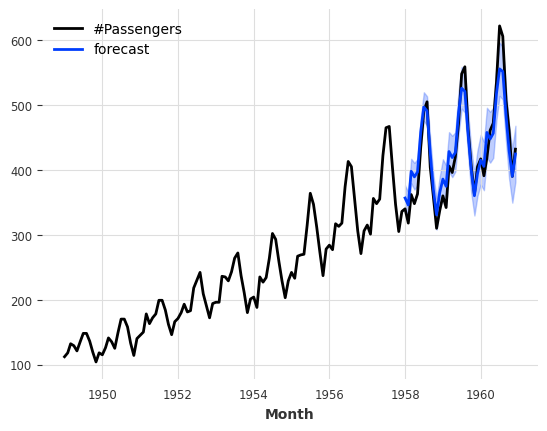

In [4]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [5]:
from darts.datasets import ETTh2Dataset

series = ETTh2Dataset().load()[:10000][["MUFL", "LULL"]]
train, val = series.split_before(0.6)


In [6]:
from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

In [8]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

<Axes: xlabel='date'>

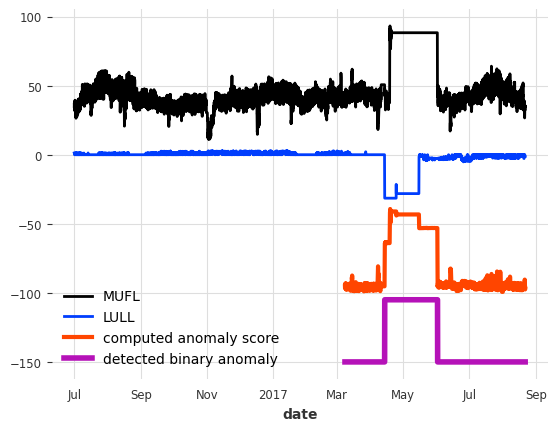

In [9]:
import matplotlib.pyplot as plt

series.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)